Evaluating Decision Tree...
Accuracy for Decision Tree: 1.0000
Precision for Decision Tree: 1.0000
Recall for Decision Tree: 1.0000
F1 Score for Decision Tree: 1.0000

Confusion Matrix for Decision Tree:
[[354   0   0]
 [  0 185   0]
 [  0   0 419]]



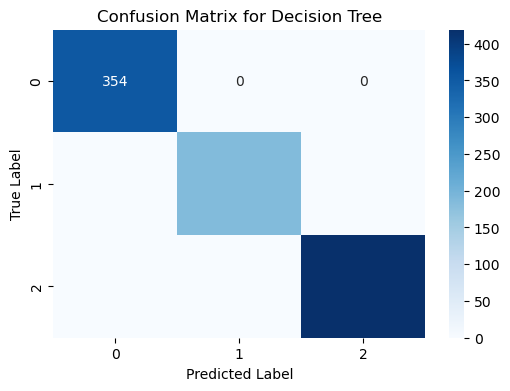

Classification Report for Decision Tree:
              precision    recall  f1-score   support

        Loss       1.00      1.00      1.00       354
        Draw       1.00      1.00      1.00       185
         Win       1.00      1.00      1.00       419

    accuracy                           1.00       958
   macro avg       1.00      1.00      1.00       958
weighted avg       1.00      1.00      1.00       958



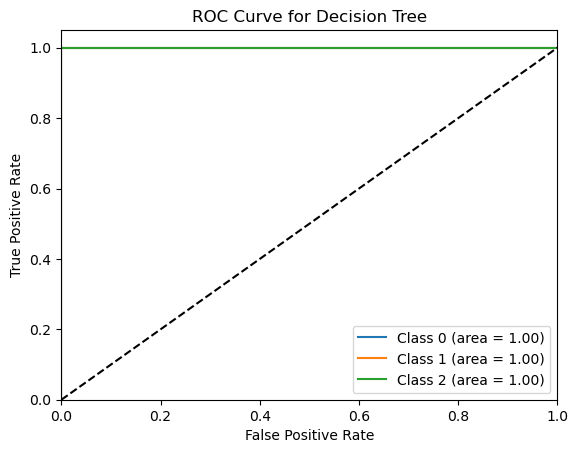

ROC AUC for Decision Tree: 1.0000

Evaluating Random Forest...
Accuracy for Random Forest: 1.0000
Precision for Random Forest: 1.0000
Recall for Random Forest: 1.0000
F1 Score for Random Forest: 1.0000

Confusion Matrix for Random Forest:
[[354   0   0]
 [  0 185   0]
 [  0   0 419]]



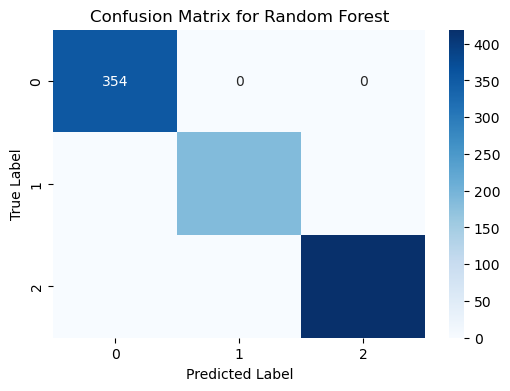

Classification Report for Random Forest:
              precision    recall  f1-score   support

        Loss       1.00      1.00      1.00       354
        Draw       1.00      1.00      1.00       185
         Win       1.00      1.00      1.00       419

    accuracy                           1.00       958
   macro avg       1.00      1.00      1.00       958
weighted avg       1.00      1.00      1.00       958



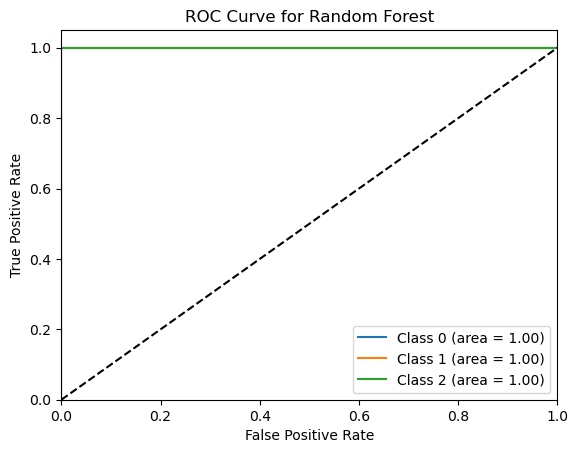

ROC AUC for Random Forest: 1.0000

Evaluating KNN...
Accuracy for KNN: 0.9864
Precision for KNN: 0.9865
Recall for KNN: 0.9864
F1 Score for KNN: 0.9864

Confusion Matrix for KNN:
[[354   0   0]
 [  4 179   2]
 [  0   7 412]]



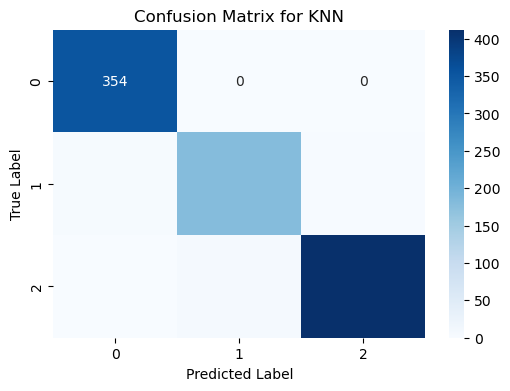

Classification Report for KNN:
              precision    recall  f1-score   support

        Loss       0.99      1.00      0.99       354
        Draw       0.96      0.97      0.96       185
         Win       1.00      0.98      0.99       419

    accuracy                           0.99       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.99      0.99      0.99       958



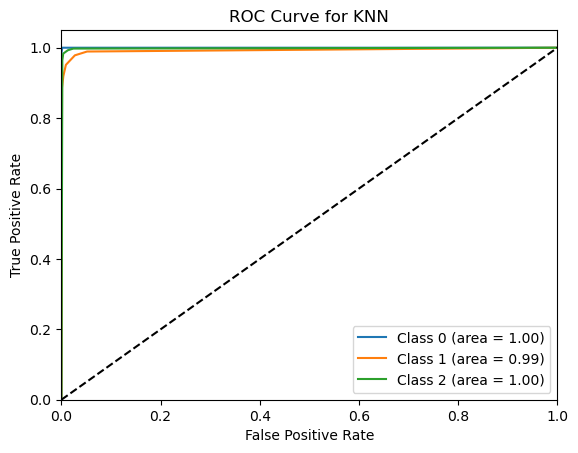

ROC AUC for KNN: 0.9975



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

# Load and Prepare Data
data = pd.read_csv('matches.csv')

# Define a mapping of team names to standardized names
team_mapping = {
    'Manchester City': 'Manchester City',
    'Manchester United': 'Manchester United',
    'Liverpool': 'Liverpool',
    'Chelsea': 'Chelsea',
    'Leicester City': 'Leicester City',
    'West Ham United': 'West Ham United',
    'Tottenham Hotspur': 'Tottenham Hotspur',
    'Arsenal': 'Arsenal',
    'Leeds United': 'Leeds United',
    'Everton': 'Everton',
    'Aston Villa': 'Aston Villa',
    'Newcastle United': 'Newcastle United',
    'Wolverhampton Wanderers': 'Wolverhampton Wanderers',
    'Crystal Palace': 'Crystal Palace',
    'Southampton': 'Southampton',
    'Brighton and Hove Albion': 'Brighton and Hove Albion',
    'Burnley': 'Burnley',
    'Fulham': 'Fulham',
    'West Bromwich Albion': 'West Bromwich Albion',
    'Sheffield United': 'Sheffield United',
    'Bournemouth': 'Bournemouth',
    'Brentford': 'Brentford',
    'Nottingham Forest': 'Nottingham Forest',
    'Luton Town': 'Luton Town',
    'Watford': 'Watford',
    'Norwich City': 'Norwich City'
}

# Standardize opponent names
data['opponent'] = data['opponent'].replace(team_mapping).fillna(data['opponent'])

# Convert categorical columns to numeric using LabelEncoder
le_team = LabelEncoder()
le_opponent = LabelEncoder()
le_venue = LabelEncoder()

data['team'] = le_team.fit_transform(data['team'])
data['opponent'] = le_opponent.fit_transform(data['opponent'])
data['venue'] = le_venue.fit_transform(data['venue'])

# Prepare feature matrix and target vector
X = data[['team', 'opponent', 'gf', 'ga', 'xg', 'xga', 'poss']]
y = data['result'].map({'W': 2, 'D': 1, 'L': 0})  # Encoding result to 2: Win, 1: Draw, 0: Loss

# Feature Selection using Chi-Square
chi_selector = SelectKBest(chi2, k=5)
X_selected = chi_selector.fit_transform(X, y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Binarize the output for multiclass ROC-AUC
y_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_binarized.shape[1]

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"Precision for {model_name}: {precision:.4f}")
    print(f"Recall for {model_name}: {recall:.4f}")
    print(f"F1 Score for {model_name}: {f1:.4f}\n")
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}\n")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Classification report
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred, target_names=['Loss', 'Draw', 'Win'])}")
    
    # Plot ROC Curve and calculate AUC
    clf = OneVsRestClassifier(model)
    y_prob = clf.fit(X_train, y_train).predict_proba(X_test)
    
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"ROC AUC for {model_name}: {roc_auc_score(y_binarized, y_prob, average='weighted'):.4f}\n")
